<a href="https://colab.research.google.com/github/KatiaItzelCortes/EDP/blob/main/ecuacion%20de%20onda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<IPython.core.display.Math object>

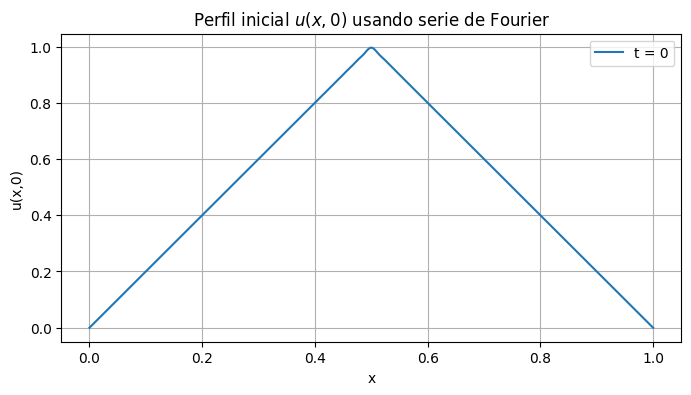

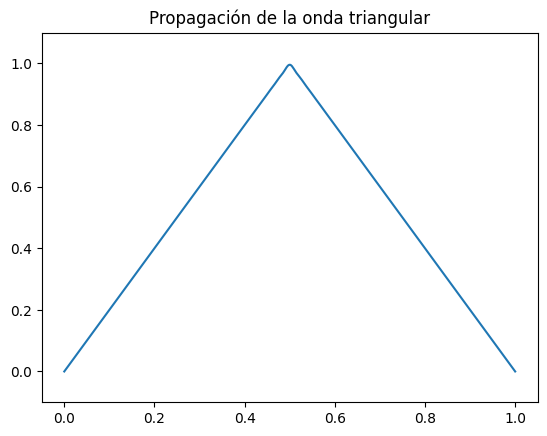

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import display, Math

# Mostrar la función analítica con LaTeX
display(Math(r"""
u(x,t) = \sum_{n=1,3,5,\dots}^{\infty} \frac{8k}{(n\pi)^2} \sin\left( \frac{n\pi}{2} \right)
\sin\left( \frac{n\pi x}{L} \right) \cos\left( \frac{n\pi c t}{L} \right)
"""))

# Parámetros
L = 1       # Longitud de la cuerda
c = 1       # Velocidad de propagación
k = 1       # Altura máxima del triángulo inicial
N = 50      # Número de términos impares en la serie
x = np.linspace(0, L, 500)  # Dominio espacial

# Solución analítica de la ecuación de onda
def u_xt(x, t, N):
    sum_series = np.zeros_like(x)
    for n in range(1, 2*N, 2):  # Solo términos impares: 1, 3, 5, ..., 2N-1
        coef = (8 * k) / (n * np.pi)**2
        term = coef * np.sin(n * np.pi / 2) * np.sin(n * np.pi * x / L) * np.cos(n * np.pi * c * t / L)
        sum_series += term
    return sum_series

# Gráfica en t = 0 (perfil inicial)
plt.figure(figsize=(8,4))
plt.plot(x, u_xt(x, 0, N), label='t = 0')
plt.title('Perfil inicial $u(x,0)$ usando serie de Fourier')
plt.xlabel('x')
plt.ylabel('u(x,0)')
plt.grid(True)
plt.legend()
plt.show()

# Animación de la onda
fig, ax = plt.subplots()
line, = ax.plot(x, u_xt(x, 0, N))
ax.set_ylim(-0.1, 1.1)
ax.set_title("Propagación de la onda triangular")

def update(t):
    line.set_ydata(u_xt(x, t, N))
    ax.set_title(f"t = {t:.2f} s")
    return line,

ani = FuncAnimation(fig, update, frames=np.linspace(0, 2, 100), interval=50)
plt.show()